# Sinusoids
M C M Wright ISVR, University of Southampton

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Series overview
This series of notebooks we're going to be looking at the **Fourier Series**. The basic idea - that periodic signals can be constructed from sums of sinusoids - is simple but profound. It underlies all frequency analysis and occurs in every part of sound and vibration. You're probably already familiar with the basic idea, and won't be surprised that if we take, say, a trumpet note whose waveform looks like this:

![Trumpet waveform](./images/trumpet-time.png)

and analyse its frequency content it'll look like this:

![Trumpet spectrum](./images/trumpet-freq.png)

i.e. a series of evenly-spaced peaks called harmonics, whose amplitude (usually) diminishes as frequency increases, and whose lowest component is at the same frequency as the note. 

As Acoustical Engineers we need to understand what's going on in more depth than that. In particular we need to be able to
 - Explain why the frequency components are evenly spaced.
 - Know what other information is needed to reconstruct the signal - if we just took a set of sines whose amplitudes and frequencies matched the peaks and added them up we wouldn't see the original signal.
 - Obtain a formula for the amplitudes of any periodic signal whose formula we know.
 - Understand how differences between signals correspond to differences in the amplitudes of their harmonics and *vice versa*.
 - Extend these concepts to non-periodic signals.
 - Write computer programs that perform frequency analysis, so that if we're given the sampled trumpet signal above we can calculate the spectrum shown.
 - Understand every option and setting on a software package that's used to calculate spectra.
 
This series of notebooks will deal explicitly with the first three of these and form the basis for addressing the remainder over the course of your degree.
 
One observation we can make at this stage is that we will be using the word 'frequency' in different ways. As well as saying that the frequency of the trumpet note is 440&nbsp;Hz we can also say that it contains Fourier components with a frequency of 440, 880, 1760&nbsp;Hz etc. The second use of 'frequency' in that sentence means 'frequency of a sinusoid' rather than the broader sense of 'inverse of the period of a periodic signal'.


## Notebook overview
In this notebook we're going to examine some of the properties of sinusoidal functions such as sin and cos. We'll be treating them as signals (functions of time) but the results apply to any other sinusoid. Sinusoids are continuous functions that are defined for every possible value of time. Because we'll be plotting them by calculating them at a finite number of discrete values of time we need to look at the implications of sampling them.

## What is a sinusoid?
A sinusoid (for the purposes of these notebooks) is any function of the form
$$
A\sin(\omega t + \phi)
$$
where $A$ is the amplitude, $\omega$ is the radial (or angular, or circular) frequency and $\phi$ is the phase shift. We also have $f = \omega/2\pi$ the frequency and $T = 2\pi/\omega = 1/f$ the period. A sinusoid goes through $f$ cycles (or periods) per second and each cycle lasts for $T$ seconds. The three parameters $\omega$, $f$ and $T$ are redundant; once you now one you know the other two, but they're all in widespread use.

The units of $T$ are seconds, the units of $f$ are Hz and the units of $\omega$ are radians per second. The units of phase-shift are radians, but othe angular units are also used. The units of $A$ depend on what quantity is varying sinusoidally, it might be pascals, volts etc. We'll mostly treat is as dimensionless here.

Sinusoids are also called sine waves, but they're not necessarily waves in the sense that sound waves are so we won't use that term here.

#### Worked example
Calculate and plot four periods of a sinusoid with amplitude $3$, period $2\,\mbox{s}$ and phase shift $20^\circ$.

#### Solution

(-5, 5)

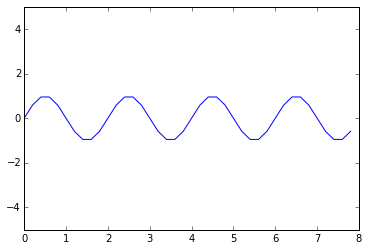

In [3]:
A = 3.0
T = 2.0
phi = (20/360)*2*pi            # Convert to radians

delta_t = T/10                 # How far apart to put the points: we'll try a tenth of a period
t = arange(0, 4*T, delta_t)    # Enough time for four peiods
plot(t, sin(2*pi*t/T + phi), '-' ) 
ylim(-5, 5)                   # Make the y-axis bigger than the result

#### Exercises
The code cell above is copied below so you can modify it to explore the effect of changing parameters. If necessary make extra copies. This string is called the linespec.
 1. The curve isn't very smooth because the time-steps `delta_t` are quite large. Replace `'-'` with `'o-'` in the plot statement to show where the calculated points are.
 2. Try setting `delta_t` to $T/6$, $T/5$, $T/4$, $T/3$ , $3T/2$ and $T$ in turn. Is the result what you expected? Make notes in the cell below.
 3. Return the linespec to `'-'` and set `delta_t` to $T/50$ to give a nice smooth curve.

### My notes
[Edit this cell to make notes on the changes you make to the time between samples]
 - `delta_t` set to $T/6$: [write your observations here]
 - `delta_t` set to $T/5$: 
 - `delta_t` set to $T/4$: 
 - `delta_t` set to $T/3$: 
 - `delta_t` set to $3T/2$: 
 - `delta_t` set to $T$: 
 
 [Try to summarise any pattern to what you've observed]

We've been keeping the period constant and varying the size of the time-step we use to sample the `sin()` function. What if the step size stays the same and the period changes?

Before investigating we'll define `fs` to be `1/delta_t`; this is the number of points in a second and is known as the *sampling frequency*. For there to be a large number of points per period the frequency of the suinusoid must be small compared eith the sampling frequency.

#### Exercise
In the code cell below the sinusoid's frequency is set to be 0.1 times the sampling frequency. A red bar of length $T$ is also drawn on the plot,and so is a more finely spaced version of the sinusoid. Try increasing that 0.1 up to 2.0 in steps of 0.1. Make notes of how the plot changes as a result and try to explain what's happening. 

(-5, 5)

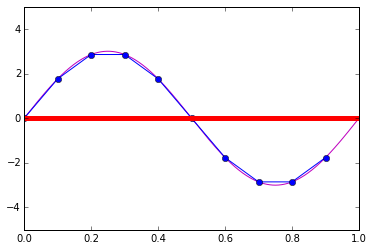

In [6]:
delta_t_coarse = 0.1             
t_coarse = arange(0, 1, delta_t_coarse)     # One second of data sampled every tenth of a second

delta_t_fine = 0.001             
t_fine = arange(0, 1, delta_t_fine)         # One second of data sampled every thousandth of a second

A = 3.0
phi = 0.0

fs = 1/delta_t_coarse                       # Sampling frequency
f = 0.1*fs                                  # CHANGE THIS LINE
T = 1/f

plot(t_fine, A*sin(2*pi*t_fine/T + phi), 'm-' )     # The true sinusoid
plot(t_coarse, A*sin(2*pi*t_coarse/T + phi), 'o-' ) # The sampled version
plot([0, T], [0, 0],'r-', linewidth=5)              # The true period
ylim(-5, 5)                  

### Your notes
[*make notes in this cell about what happens in each case*]

 - $f = 0.1\times f_s$ ...
 - $f = 0.2\times f_s$ ...
 - $f = 0.3\times f_s$ ...
 - $f = 0.4\times f_s$ ...
 - $f = 0.5\times f_s$ ...
 [add more lines as necessary]
 

## Conclusion

This behaviour is called aliasing. It's an important thing to know about when we're dealing with sampled data, but for the remainder of these notebooks we'll just note that as long as the sampling frequency is much higher than the frequency of the sinusoid we can ignore sampling effects and treat it like a continuous signal.

#### Advanced exercise

Python's floating point numbers are stored with finite precision, so there must be some minimum variation in the argument of a `sin()` or `cos()` that we can't get smaller than. Find out what it is, and find out the sampling frequency frequency that corresponds to if that argument is $\omega t$ and $t$ has seconds as its units. Record your answers in a markdown cell.